## Problem Statement: Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

## Basic Metrics:

* Number of movies released per year
* Distribution of TV shows and movies
* Popular genres and their frequency
* Top actors and directors
* Availability of content in different countries

In [1]:
#Here we are going to import all relevant libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import warnings # Importing warnings to ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\visha\Downloads\Netflix Business Case.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### How many rows and columns we have in our data?

In [3]:
#How many rows and columns we have in our data?
df.shape

(8807, 12)

#### We have 8807 rows and 12 columns in our original dataset

In [4]:
# Convert categorical attributes to 'category' data type
categorical_cols = ['type', 'director', 'cast', 'country', 'rating', 'listed_in']
df[categorical_cols] = df[categorical_cols].astype('category')

In [5]:
#Here we are presenting top 10 rows
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
#Using describe() method to check some statistical informstion about the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#Data type of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   category
 4   cast          7982 non-null   category
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(6), int64(1), object(5)
memory usage: 1.0+ MB


In [8]:
#lets find unique values in dataset using nunique() method , it excludes NA values by default
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
#Checking Missing Values
df.isnull().values.any()

True

In [10]:
#Total number of null values in entire dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

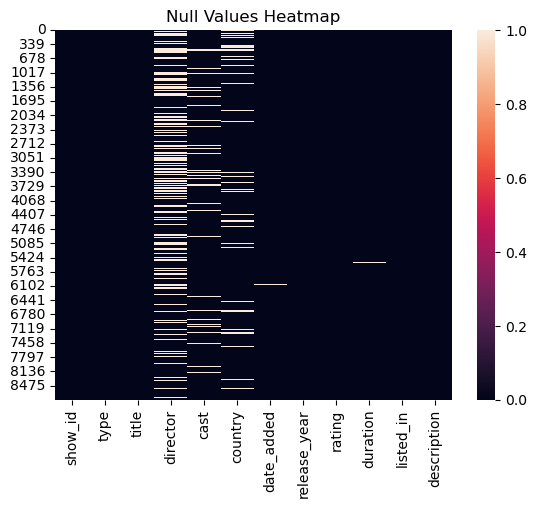

In [11]:
#This is the visual representation of null values present
sns.heatmap(df.isnull())
plt.title("Null Values Heatmap")
plt.show

In [12]:
# Dropping rows with less missing values, and this will help us to perform analysis easily
df.dropna(subset=["rating","duration","date_added"],axis=0,inplace=True)

### Non-Graphical Analysis: Value counts and unique attributes 

In [13]:
df['type'].unique() # Return unique categorical values of "type" column

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [14]:
df['type'].nunique() # Returns total no of unique values in "type" column

2

In [15]:
df['type'].value_counts() # Return count of unique values of "type" column

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [16]:
df['director'].unique() # Return unique categorical values of "director" column

['Kirsten Johnson', NaN, 'Julien Leclercq', 'Mike Flanagan', 'Robert Cullen, José Luis Ucha', ..., 'Mu Chu', 'Chandra Prakash Dwivedi', 'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh']
Length: 4527
Categories (4528, object): ['A. L. Vijay', 'A. Raajdheep', 'A. Salaam', 'A.R. Murugadoss', ..., 'Ísold Uggadóttir', 'Óskar Thór Axelsson', 'Ömer Faruk Sorak', 'Şenol Sönmez']

In [17]:
df['director'].nunique() # Returns total no of unique values in "director" column

4526

In [18]:
df['director'].value_counts() # Return count of unique values of "director" column

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
                          ..
Jose Gomez                 1
Jose Javier Reyes          1
Bille August               1
Louis C.K.                 0
Alessandro Pepe            0
Name: director, Length: 4528, dtype: int64

In [19]:
df['country'].unique() # Return unique categorical values of "country" column

['United States', 'South Africa', NaN, 'India', 'United States, Ghana, Burkina Faso, United Ki..., ..., 'Russia, Spain', 'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada', 'United States, France, South Korea, Indonesia', 'United Arab Emirates, Jordan']
Length: 749
Categories (748, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Venezuela, Colombia', 'Vietnam', 'West Germany', 'Zimbabwe']

In [20]:
df['country'].nunique() # Returns total no of unique values in "country" column

748

In [21]:
df['country'].value_counts() # Return count of unique values of "country" column

United States                                                                          2809
India                                                                                   972
United Kingdom                                                                          418
Japan                                                                                   243
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                        

In [22]:
df['rating'].unique() # Return unique categorical values of "rating" column

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
Length: 14
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [23]:
df['rating'].nunique() # Returns total no of unique values in "rating" column

14

In [24]:
df['rating'].value_counts() # Return count of unique values of "rating" column

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         0
84 min         0
66 min         0
Name: rating, dtype: int64

In [25]:
df['listed_in'].unique() # Return unique categorical values of "listed_in" column

['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'Crime TV Shows, International TV Shows, TV Ac..., 'Docuseries, Reality TV', 'International TV Shows, Romantic TV Shows, TV..., ..., 'Action & Adventure, Comedies, Horror Movies', 'Classic & Cult TV, Crime TV Shows, TV Dramas', 'Action & Adventure, Documentaries, Sports Mov..., 'International Movies, LGBTQ Movies, Romantic ..., 'Cult Movies, Dramas, Thrillers']
Length: 513
Categories (514, object): ['Action & Adventure', 'Action & Adventure, Anime Features', 'Action & Adventure, Anime Features, Children ..., 'Action & Adventure, Anime Features, Classic M..., ..., 'TV Horror, Teen TV Shows', 'TV Sci-Fi & Fantasy, TV Thrillers', 'TV Shows', 'Thrillers']

In [26]:
df['listed_in'].nunique() # Returns total no of unique values in "listed_in" column

513

In [27]:
df['listed_in'].value_counts() # Return count of unique values of "listed_in" column

Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Cult Movies, Dramas, Music & Musicals                           1
Cult Movies, Dramas, Thrillers                                  1
Cult Movies, Horror Movies, Thrillers                           1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy      1
British TV Shows, TV Comedies, TV Dramas                        0
Name: listed_in, Length: 514, dtype: int64

### Insights : 
* We have total of 2 categories containing 6126 movies and 2664 TV Shows.
* We have total of 4527 unique directors.
* We have total of 749 unique countries.
* We have total of 14 unique ratings values.
* We have total of 513 unique listed_in values.

### Visual Analysis - Univariate, Bivariate after pre-processing of the data

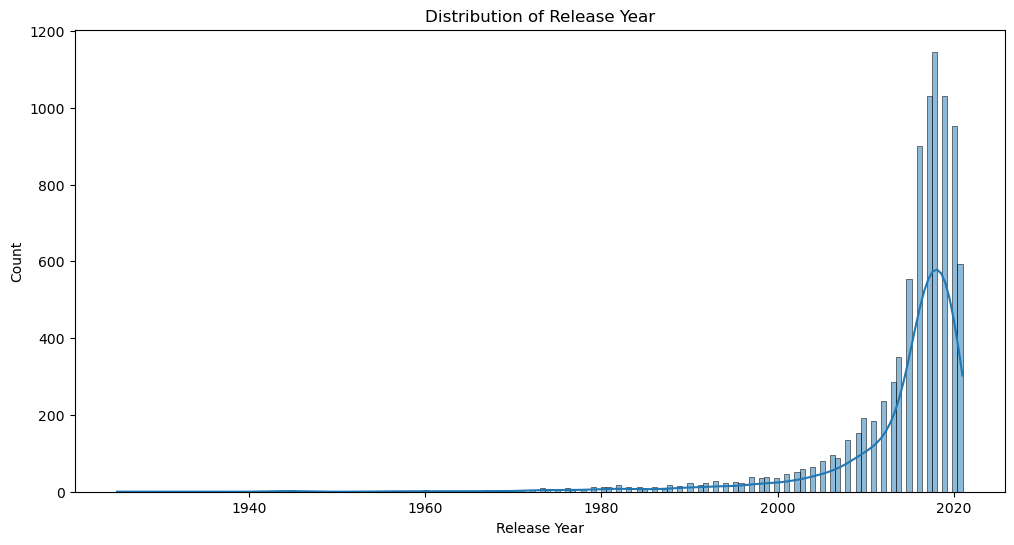

In [28]:
# Univariate analysis for 'release_year'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', kde=True)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

### Insights: As we can see, the count of movies increased since 2000.

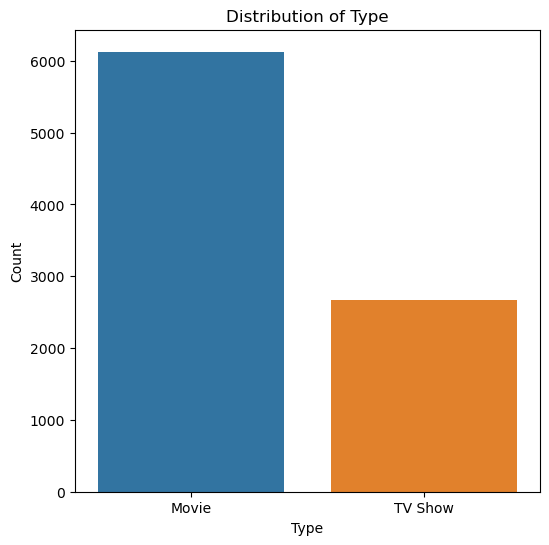

In [29]:
# Countplot for 'Type'
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='type')
plt.title("Distribution of Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### Insights: We have 6126 movies and 2664 TV Shows

<Axes: ylabel='type'>

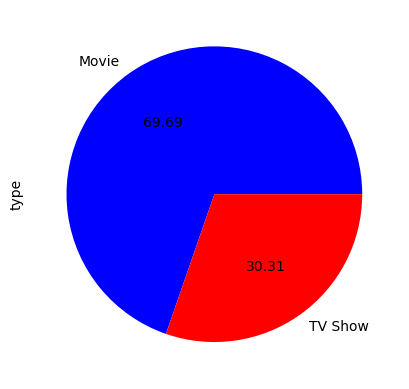

In [30]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f", colors=["blue","red"])

### Insight : We have 69.62% movies and 30.38% TV Shows.

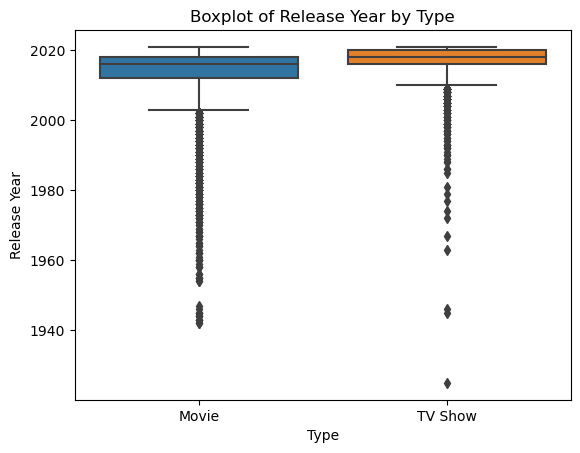

In [31]:
# Boxplot for Type
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Boxplot of Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

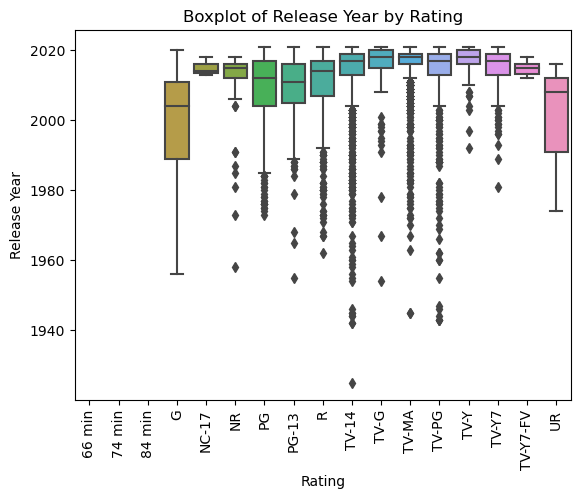

In [32]:
# Boxplot for Rating
sns.boxplot(x='rating', y='release_year', data=df)
plt.title('Boxplot of Release Year by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=90)
plt.show()

In [33]:
df_rating=df["rating"].value_counts().sort_values(ascending=False).index
df_rating

CategoricalIndex(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y',
                  'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17', '74 min',
                  '84 min', '66 min'],
                 categories=['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], ordered=False, dtype='category')

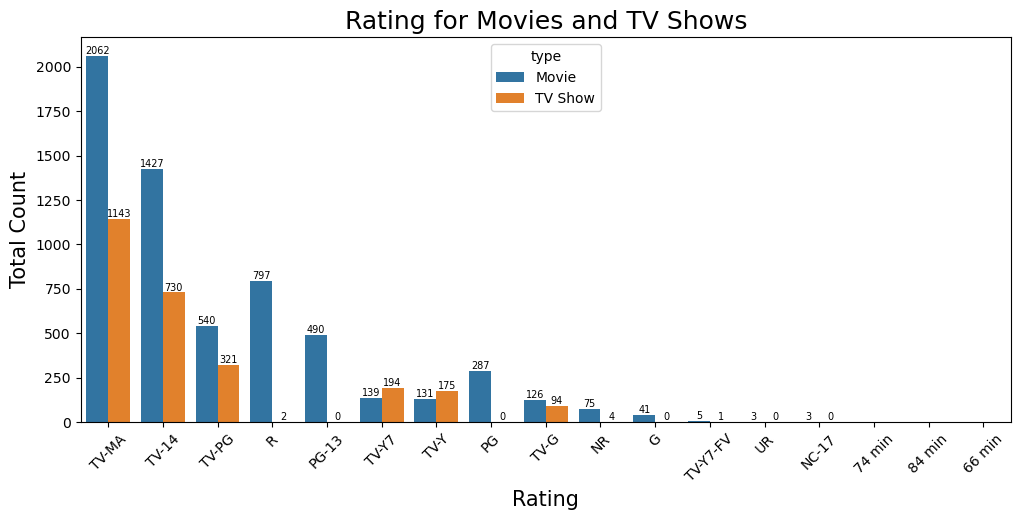

In [34]:
plt.figure(figsize=(12, 5))
df1=sns.countplot(data=df,x="rating",hue="type",order=df_rating)
for i in df1.containers:
    df1.bar_label(i, fontsize = 7)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Rating for Movies and TV Shows", fontsize = 18)
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Total Count", fontsize = 15)
plt.show()

### Insight
* We can see clearly there is a dominance of movies in the top 5 ratings from the rating column.
* The largest count of netflix content is made with a "TV-MA" rating. "TV-MA" is a rating assigned by TV Parental Guidelines.

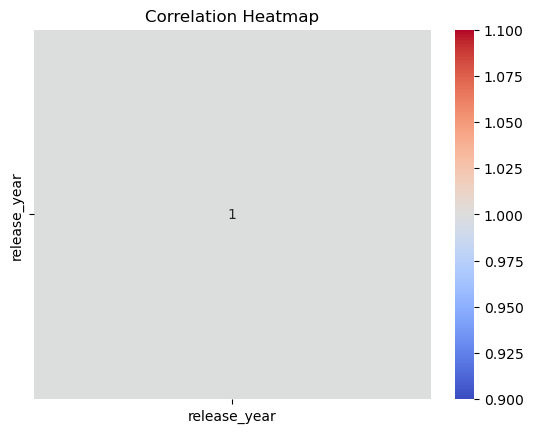

In [35]:
# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

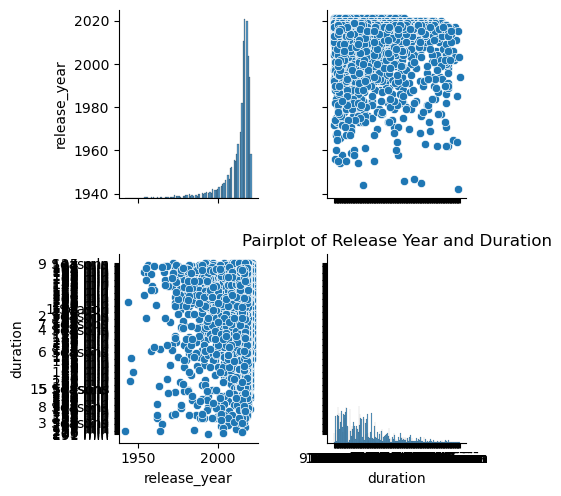

In [36]:
sns.pairplot(df.dropna(), vars=['release_year', 'duration'])
plt.title('Pairplot of Release Year and Duration')
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
plt.show()

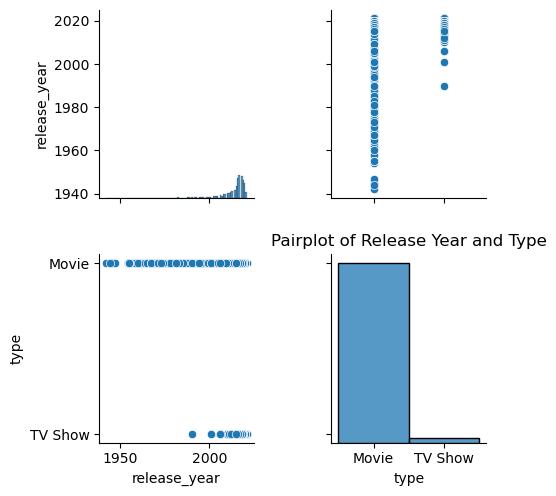

In [37]:
sns.pairplot(df.dropna(), vars=['release_year', 'type'])
plt.title('Pairplot of Release Year and Type')
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
plt.show()

### Converting date_added column to integer and adding new column date_int to df to plot Distplot, countplot, histogram for univariate analysis

In [38]:
df["date_format"]=pd.to_datetime(df["date_added"]) # A new column date_format is created.
df["date_added_int"]=(df["date_format"].dt.year).astype(int) # Extracting year from date_format column and converting it into int type.
df["date_added_int"]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added_int, Length: 8790, dtype: int32

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   category      
 2   title           8790 non-null   object        
 3   director        6169 non-null   category      
 4   cast            7965 non-null   category      
 5   country         7961 non-null   category      
 6   date_added      8790 non-null   object        
 7   release_year    8790 non-null   int64         
 8   rating          8790 non-null   category      
 9   duration        8790 non-null   object        
 10  listed_in       8790 non-null   category      
 11  description     8790 non-null   object        
 12  date_format     8790 non-null   datetime64[ns]
 13  date_added_int  8790 non-null   int32         
dtypes: category(6), datetime64[ns](1), int32(1), int64(1), o

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021


#### Splitting the data into 2 parts

In [41]:
# Fetching all the Data where df['type'] is equal to Movie
movies=df.loc[df["type"]=="Movie"]
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021


In [42]:
movies.shape

(6126, 14)

In [43]:
sorted_movies_year=np.sort(movies["date_added_int"].unique())
sorted_movies_year

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [44]:
movies_year_count = movies["date_added_int"].value_counts().sort_index(ascending=True)
print(movies_year_count)

2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: date_added_int, dtype: int64


In [45]:
# Fetching all the Data where df['type'] is equal to TV Show
tv_shows=df.loc[df["type"]=="TV Show"]
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,2021


In [46]:
tv_shows.shape

(2664, 14)

In [47]:
sorted_tv_shows_year=np.sort(tv_shows["date_added_int"].unique())
sorted_tv_shows_year

array([2008, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [48]:
tv_shows_year_count = tv_shows["date_added_int"].value_counts().sort_index(ascending=True)
print(tv_shows_year_count)

2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: date_added_int, dtype: int64


#### Line Plot for Movies vs TV Shows added per year

<Figure size 1200x500 with 0 Axes>

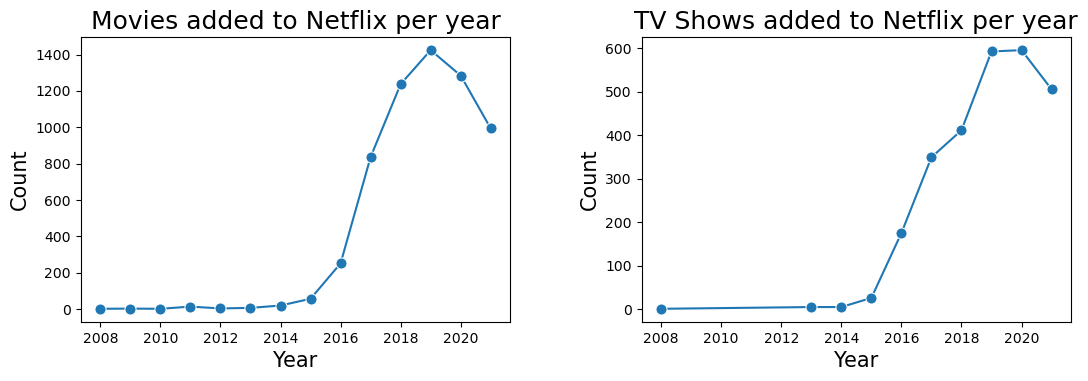

In [49]:
plt.figure(figsize=(12, 5)) 
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Plot movies on the first subplot
sns.lineplot(x=sorted_movies_year, y=movies_year_count, marker='o', markersize=8, ax=axes[0])
axes[0].set_title("Movies added to Netflix per year", fontsize = 18)
axes[0].set_xlabel("Year", fontsize = 15)
axes[0].set_ylabel("Count", fontsize = 15)

# Plot TV shows on the second subplot
sns.lineplot(x=sorted_tv_shows_year, y=tv_shows_year_count, marker='o', markersize=8, ax=axes[1])
axes[1].set_title("TV Shows added to Netflix per year", fontsize = 18)
axes[1].set_xlabel("Year", fontsize = 15)
axes[1].set_ylabel("Count", fontsize = 15)
# Adjust the spacing between subplots
plt.tight_layout(pad=5.0)
# Display the figure
plt.show()

### Insight for movies : We can see an upward inclination since 2015 i.e Netflix started adding more movies from 2015 compare to previous years.
#### Total movies added per year tops in 2019 and then we can see gradual decline in adding movies
### Insight for TV-Shows:We can see an upward inclination since 2015 i.e Netflix started adding more TV-Shows from 2015 compare to previous years
#### Total TV-Shows added per year tops in 2020 and then we can see gradual decline in adding Tv-Shows

### Univariate Analysis on Duration Column of movies

In [50]:
#Replacing min to empty string and converting that column to integer type
movies["duration"]=movies["duration"].str.replace("min","")
movies["duration"]=movies["duration"].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         6126 non-null   object        
 1   type            6126 non-null   category      
 2   title           6126 non-null   object        
 3   director        5939 non-null   category      
 4   cast            5651 non-null   category      
 5   country         5687 non-null   category      
 6   date_added      6126 non-null   object        
 7   release_year    6126 non-null   int64         
 8   rating          6126 non-null   category      
 9   duration        6126 non-null   int32         
 10  listed_in       6126 non-null   category      
 11  description     6126 non-null   object        
 12  date_format     6126 non-null   datetime64[ns]
 13  date_added_int  6126 non-null   int32         
dtypes: category(6), datetime64[ns](1), int32(2), int64(1), o

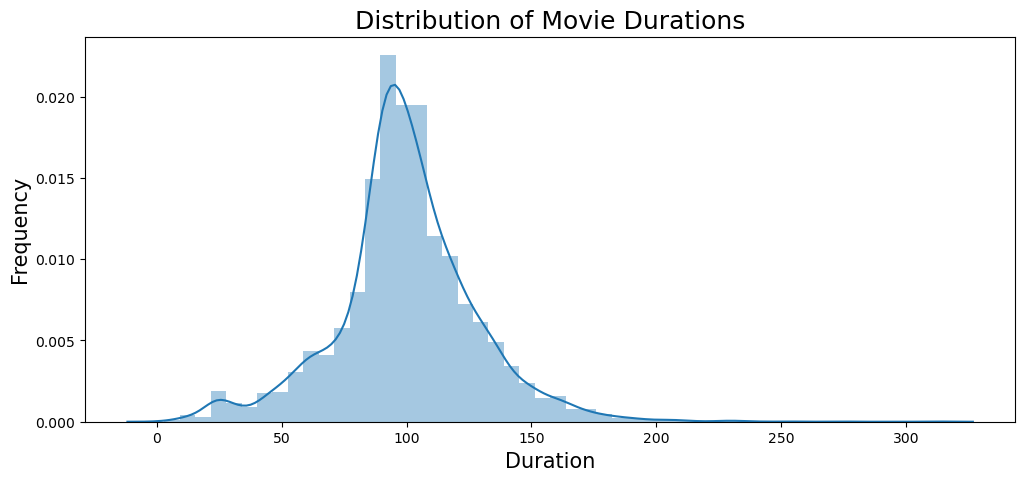

In [51]:
# Plotting Histogram for Movie Durations
plt.figure(figsize=(12, 5))
sns.distplot(x=movies["duration"], kde=True)
plt.xlabel("Duration", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title('Distribution of Movie Durations', fontsize = 18)
plt.show()

In [52]:
movies["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int32

In [53]:
movies["duration"].mean() #Average duration of movie

99.58488410055502

In [54]:
movies["duration"].min() #Min duration of movie

3

In [55]:
movies["duration"].max() #Max duration of movie

312

In [56]:
movies[movies["duration"]==movies["duration"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019-06-04,2019


In [57]:
movies[movies["duration"]==movies["duration"].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018


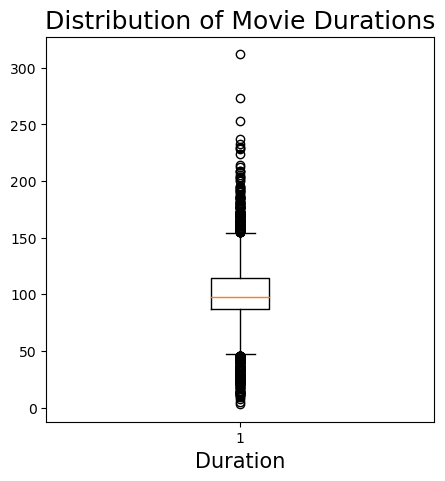

In [58]:
fig = plt.figure(figsize =(5, 5))
 
# Creating plot
plt.boxplot(movies["duration"])
 
# show plot
plt.xlabel("Duration", fontsize = 15)
plt.title('Distribution of Movie Durations', fontsize = 18)
plt.show()

### Insights: We have detected outliers as 3 being min duration and 312 being max duration and most of the duration of movies lies between 50- 150 mins

### Univariate Analysis on Duration column for TV-Shows

In [59]:
tv_shows["duration"]=tv_shows["duration"].str.replace("Seasons","") # Replacing Seasons with empty string
tv_shows["duration"]=tv_shows["duration"].str.replace("Season","") # Replacing Season with empty string
tv_shows["duration"]=tv_shows["duration"].astype(int) # Converting Duration column to interger type
tv_shows["duration"]

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2664, dtype: int32

In [60]:
tv_shows["duration"]

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2664, dtype: int32

In [61]:
tv_shows["duration"].value_counts()

1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

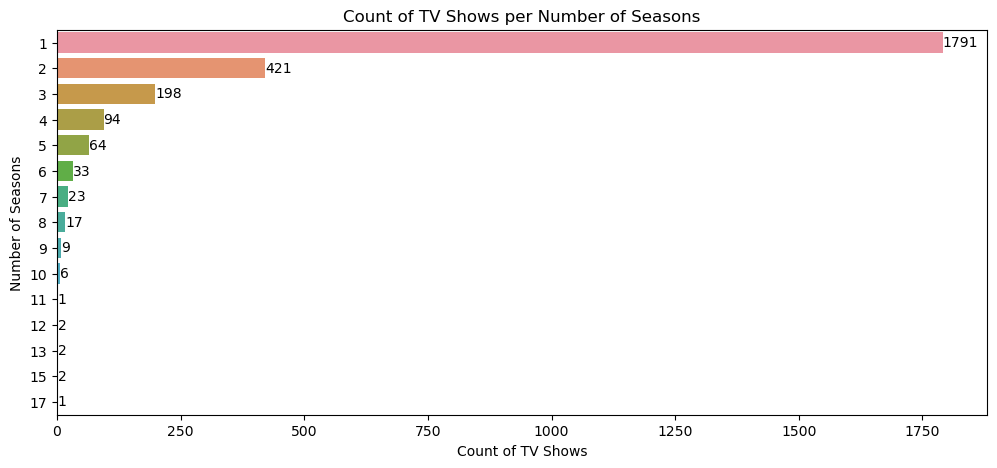

In [62]:
plt.figure(figsize=(12, 5))
df2=sns.countplot(data=tv_shows, y="duration")
for i in df2.containers:
    df2.bar_label(i)
plt.xlabel("Count of TV Shows")
plt.ylabel("Number of Seasons")
plt.title("Count of TV Shows per Number of Seasons")
plt.show()

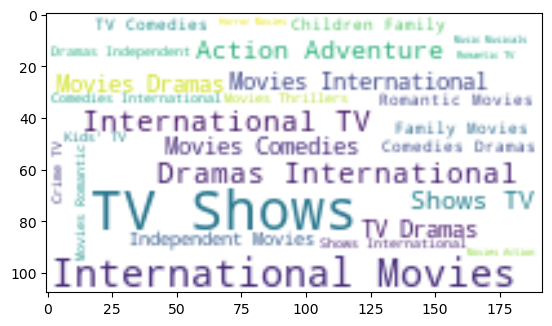

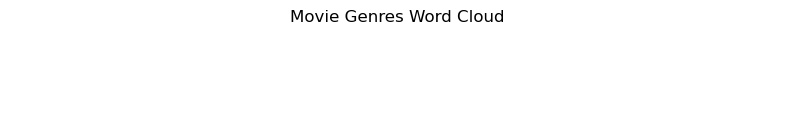

In [63]:
# Concatenate all genre values into a single string
wordcloud=WordCloud(background_color="white", width=192,height=108).generate(" ".join(df.listed_in))
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(figsize=(10, 1))
plt.axis("off")
plt.title("Movie Genres Word Cloud")
plt.show()

In [64]:
# Convert the values in country column to list
country_df=df.copy()
country_df['country'] = country_df['country'].astype('str').apply(
lambda x: x.split(', '))
# Explode the rows with multiple countries to different rows
country_df = country_df.explode('country').drop_duplicates()
country_count = country_df.groupby(['type','country'])['show_id'].nunique()
country_count = country_count.reset_index().sort_values('show_id',
ascending=False)
country_count.drop(country_count[country_count['country']=='nan'].index, inplace=True)
country_count

,type,country,show_id
119,Movie,United States,2748
47,Movie,India,962
247,TV Show,United States,932
117,Movie,United Kingdom,532
22,Movie,Canada,319
...,...,...,...
188,TV Show,Latvia,0
186,TV Show,Kenya,0
185,TV Show,Kazakhstan,0
182,TV Show,Jamaica,0


## Visual Analysis: Bivariate/Multivariate

### Popular Genres by Country

In [65]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8790, dtype: category
Categories (514, object): ['Action & Adventure', 'Action & Adventure, Anime Features', 'Action & Adventure, Anime Features, Children ..., 'Action & Adventure, Anime Features, Classic M..., ..., 'TV Horror, Teen TV Shows', 'TV Sci-Fi & Fantasy, TV Thrillers', 'TV Shows', 'Thrillers']

In [66]:
# Convert the values in listed_in column to list
country_df["listed_in"]=country_df["listed_in"].astype("str").apply(lambda x: x.split(","))
country_genre_df = country_df.explode('listed_in').drop_duplicates()

In [67]:
country_genre_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021-09-24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020-01-11,2020
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020-01-11,2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02,2019
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02,2019


### Popular Actors by Country

In [68]:
## Convert the values in cast column to list
actor_df = country_genre_df.copy()
actor_df['cast'] = actor_df['cast'].astype('str').apply(lambda x: x.split(', '))
# Explode the rows with multiple actors to different rows
actor_df = actor_df.explode('cast').drop_duplicates()

In [69]:
actor_df=actor_df.drop(actor_df[actor_df['cast']=='nan'].index)

In [70]:
#Preparing Data for visualisation
country_names = ['India', 'United Kingdom', 'United States', 'Canada', 'France', 'Japan']
v_names = ['india_actors', 'uk_actors', 'us_actors', 'canada_actors', 'france_actors', 'japan_actors']
data=[]
def country_wise_actors(country_name, var_name):
    var_name = actor_df.loc[(actor_df['type']=='Movie') & (actor_df['country']==country_name)].groupby('cast')['show_id'].nunique().sort_values(ascending=False).reset_index().head(10)
    data.append(var_name)
    return data
for country_name, var_name in zip(country_names, v_names):
    country_wise_actors(country_name, var_name)
data

[               cast  show_id
 0       Anupam Kher       40
 1    Shah Rukh Khan       34
 2  Naseeruddin Shah       31
 3      Akshay Kumar       29
 4           Om Puri       29
 5      Paresh Rawal       28
 6  Amitabh Bachchan       28
 7       Boman Irani       27
 8    Kareena Kapoor       25
 9        Ajay Devgn       21,
                    cast  show_id
 0           John Cleese       11
 1         Michael Palin        9
 2            Judi Dench        9
 3       Brendan Gleeson        8
 4  Helena Bonham Carter        8
 5             Eric Idle        7
 6         Terry Gilliam        7
 7          Eddie Marsan        7
 8           Johnny Depp        7
 9           James Cosmo        7,
                 cast  show_id
 0  Samuel L. Jackson       21
 1       Adam Sandler       20
 2       James Franco       19
 3       Nicolas Cage       18
 4         Seth Rogen       15
 5     Morgan Freeman       15
 6       Bruce Willis       15
 7      Molly Shannon       15
 8    Fred Tata

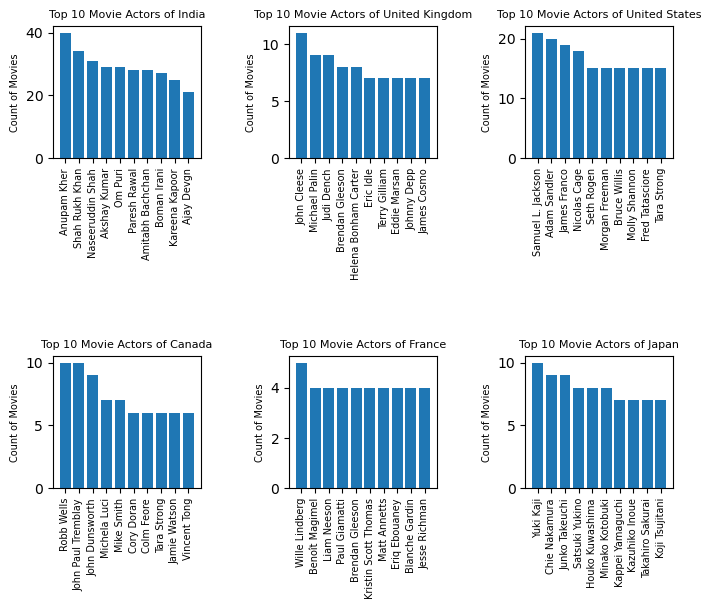

In [71]:
#Top 10 Movie Actors by Country
fig, axes = plt.subplots(2, 3, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    ax.bar(data[i]['cast'], data[i]['show_id'])
    ax.set_xticks(np.arange(0,10), labels=data[i]['cast'], rotation='vertical', fontsize = 7)
    ax.set_title(f'Top 10 Movie Actors of {country_names[i]}', fontsize = 8)
    ax.set_ylabel('Count of Movies', fontsize = 7)
plt.subplots_adjust(hspace = 1.5, wspace = 0.6)
plt.show()

### Popular Directors by genre

In [72]:
## Convert the values in director column to list
director_df = country_genre_df.copy()
director_df['director'] = director_df['director'].astype('str').apply(
lambda x: x.split(', '))
# Explode the rows with multiple directors to different rows
director_df = director_df.explode('director').drop_duplicates()
# Drop rows with missing cast values
director_df = director_df.drop(director_df[director_df['director']=='nan'].index)

In [73]:
 #Preparing Data for visualisation
genre_names = ['Action & Adventure', 'Children & Family Movies', 'Comedies', 'Dramas', 'International Movies', 'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers']
v_names = ['action', 'family', 'comedies', 'dramas', 'int_movies', 'int_tv', 'scifi', 'thrillers']
data=[]
def genre_wise_directors(genre_name, var_name):
    var_name = director_df.loc[(director_df['listed_in']==genre_name)].groupby('director')['show_id'].nunique().sort_values(ascending=False).reset_index().head(5)
    data.append(var_name)
    return data
for genre_name, var_name in zip(genre_names, v_names):
    genre_wise_directors(genre_name, var_name)
data

[            director  show_id
 0   Don Michael Paul        9
 1     S.S. Rajamouli        7
 2  Toshiya Shinohara        7
 3     Hidenori Inoue        7
 4   Steven Spielberg        5,
            director  show_id
 0     Rajiv Chilaka       22
 1       Suhas Kadav       16
 2     Prakash Satam        7
 3  Robert Rodriguez        7
 4      Robert Vince        6,
               director  show_id
 0          Hakan Algül        8
 1  Cathy Garcia-Molina        7
 2         David Dhawan        7
 3       Kıvanç Baruönü        5
 4          Omoni Oboli        5,
             director  show_id
 0   Hanung Bramantyo        8
 1     Kunle Afolayan        6
 2        Umesh Mehra        5
 3  Madhur Bhandarkar        5
 4     Clint Eastwood        5,
                    director  show_id
 0          Theodore Boborol        3
 1  Fernando González Molina        3
 2   Saratswadee Wongsomphet        2
 3       Cathy Garcia-Molina        2
 4         Daniel Calparsoro        2,
            direc

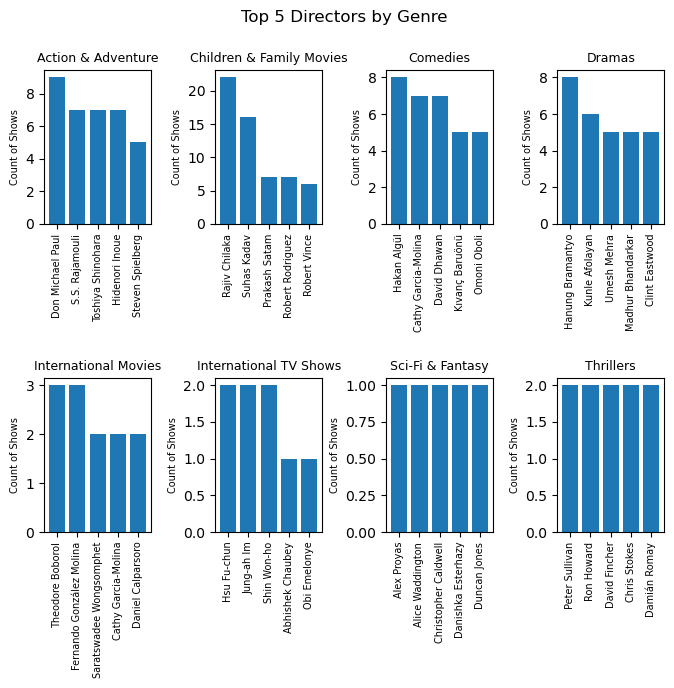

In [74]:
#Top 5 Directors by Genre
fig, axes = plt.subplots(2, 4, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    ax.bar(data[i]['director'], data[i]['show_id'])
    ax.set_xticks(np.arange(0,5), labels=data[i]['director'], rotation='vertical', fontsize = 7)
    ax.set_title(f'{genre_names[i]}', fontsize = 9)
    ax.set_ylabel('Count of Shows', fontsize = 7)
plt.suptitle("Top 5 Directors by Genre")
plt.subplots_adjust(hspace = 1.0, wspace = 0.6)
plt.show()

### Inferences and Conclusions:
We have drawn many interesting inferences from the dataset Netflix titles. Here’s a summary of the few of them:
* The most content type on Netflix is Movies.
* The country by the amount of the produces content is the United States,
* The most popular director on Netflix , with the most titles, is Jan Suter.
* International Movies is a genre that is mostly in Netflix.
* Highest count of Netflix content is made with a “TV-MA” rating.
* The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai.
* The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.
* It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

### Business Insights Range of Attributes: 
- Type of Show: Approx 70% are Movies and remaining 30% are TV shows.
The release year for shows is concentrated in the range 2000-2021.
The year of adding shows is concentrated in the range 2015-2021.
- Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot).
- TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers.
- Countries: Out of 128 countries present in the dataset, only 23 countries have more than 50 movie titles and only 11 countries have more than 50.
- TV Shows Ratings: There are 12 different kinds of ratings based on the relevance of the content for different age-groups.
The dataset consists of 36,392 actors and 4,991 directors.
- Type of content across Countries: USA, followed by India, UK, Canada, France have the highest number of movie listings.
USA, followed by UK, Japan, South Korea and Canada have the highest number of TV show listings.
Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
- Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain).
United States and UK have a good mix of almost all genres.
- Content Rating: Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 (14 yrs & above) & R/TV-PG (Restricted/Parental Guidance).
Overall, Netflix has an unproportionately large amount of adult content across all countries.
There is scarce content for general audience (TV-G & G) across all countries except US.
- Genre: Most popular genres: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers.
- Duration: There is a surge in the number of short duration movies (less than 75 mins) post 2010.
All 1-5 season TV shows are concentrated in 2010-2020 release year window.
Older TV Shows have more number of seasons.

### Recommendations :
1. Add more content for young/general audiences: 80% of the content on netflix (7022 out of 8790 titles) is either for mature audiences or requires parental guidance. In order to expand its target audience, Netflix needs to add more shows for familyand children.
2. Add more variety of content in countries other than US/UK: While US and UK have a healthy mix of all categories of content, other contries do not.
3. At least other english speaking countries like Australia and India should have an equally good mix of content. A wider population can be targeted with more titles in genres like documentaries, horror, standup comedy, crime and musicals for these countries. Country-specific genres: Just like Korean drama and Anime are available in Korea/Japan, more country-specific niches should be created in order to build more customisation. French and German shows would increase business in Europe. India also has blockbusters in many regional languages.